In [1]:
# import library
import numpy as np
import pandas as pd
import scipy.sparse as sp
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# load the datasets (features and labels)
x_train_original = pd.read_csv("book_rating_train.csv")
y = x_train_original['rating_label']

In [3]:
# fill in missing values
x_train_original['Publisher'].fillna('Unknown', inplace=True)
x_train_original['Language'].fillna('Missing', inplace=True)

In [4]:
# combine features
features = pd.concat([x_train_original['PublishYear'], x_train_original['PublishMonth'],
                      x_train_original['PublishDay'], x_train_original['pagesNumber']], axis = 1)

In [5]:
# convert text features to numerical representation using vectorizer
vectorizer1 = TfidfVectorizer()
publisher = vectorizer1.fit_transform(x_train_original['Publisher'])

vectorizer2 = TfidfVectorizer()
language = vectorizer2.fit_transform(x_train_original['Language'])

In [6]:
# load text encoded CountVectorizer for name, authors, and desc
matrix_name = sp.load_npz('train_name_vec.npz')
matrix_authors = sp.load_npz('train_authors_vec.npz')
matrix_desc = sp.load_npz('train_desc_vec.npz')

In [7]:
# combine all features
matrix_combine = hstack([features, matrix_name])
matrix_combine_2 = hstack((matrix_combine, matrix_authors))
matrix_train = hstack((matrix_combine_2, matrix_desc))
matrix2 = hstack((matrix_train, publisher))
matrix = hstack((matrix2, language))

In [8]:
# separate datasets to train and test and scaling before apply model
scaler = MaxAbsScaler()

X_train, X_test, y_train, y_test = train_test_split(matrix, y, train_size=0.8, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [9]:
# set classifier model to be run
classifiers = [svm.LinearSVC(C=0.0001), svm.LinearSVC(C=0.005), svm.LinearSVC(C=0.001), svm.LinearSVC(C=0.05), 
          svm.LinearSVC(C=0.01), svm.LinearSVC(C=0.5), svm.LinearSVC(C=0.1), svm.LinearSVC(C=1.0)]

tune = ['C = 0.0001', 'C = 0.005', 'C = 0.001', 'C = 0.05', 'C = 0.01', 'C = 0.5', 'C = 0.1', 'C = 1.0']

In [10]:
# fit Linear SVM model and compare accuracy and classification report for each hyperparameter 

accuracy_list= []
for par, clf in zip(tune, classifiers):
    print('Linear SVM with', par)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    accuracy_list.append(accuracy)
    print('Accuracy:', accuracy)
    print(classification_report(y_test, pred))

Linear SVM with C = 0.0001
Accuracy: 0.7112508129200087
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00      1136
         4.0       0.71      1.00      0.83      3281
         5.0       0.00      0.00      0.00       196

    accuracy                           0.71      4613
   macro avg       0.24      0.33      0.28      4613
weighted avg       0.51      0.71      0.59      4613

Linear SVM with C = 0.005


/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

Accuracy: 0.7242575330587471
              precision    recall  f1-score   support

         3.0       0.69      0.09      0.17      1136
         4.0       0.73      0.99      0.84      3281
         5.0       1.00      0.01      0.01       196

    accuracy                           0.72      4613
   macro avg       0.80      0.36      0.34      4613
weighted avg       0.73      0.72      0.64      4613

Linear SVM with C = 0.001
Accuracy: 0.7116843702579666
              precision    recall  f1-score   support

         3.0       1.00      0.00      0.00      1136
         4.0       0.71      1.00      0.83      3281
         5.0       0.00      0.00      0.00       196

    accuracy                           0.71      4613
   macro avg       0.57      0.33      0.28      4613
weighted avg       0.75      0.71      0.59      4613

Linear SVM with C = 0.05


/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

Accuracy: 0.7151528289616301
              precision    recall  f1-score   support

         3.0       0.50      0.32      0.39      1136
         4.0       0.76      0.89      0.82      3281
         5.0       0.71      0.12      0.21       196

    accuracy                           0.72      4613
   macro avg       0.65      0.44      0.47      4613
weighted avg       0.69      0.72      0.69      4613

Linear SVM with C = 0.01
Accuracy: 0.7305441144591373
              precision    recall  f1-score   support

         3.0       0.62      0.18      0.27      1136
         4.0       0.74      0.96      0.84      3281
         5.0       1.00      0.06      0.11       196

    accuracy                           0.73      4613
   macro avg       0.79      0.40      0.41      4613
weighted avg       0.72      0.73      0.67      4613

Linear SVM with C = 0.5
Accuracy: 0.6891393886841535
              precision    recall  f1-score   support

         3.0       0.45      0.41      0.43    

In [11]:
# matrices for all features excluding language
matrix_combine = hstack([features, matrix_name])
matrix_combine_2 = hstack((matrix_combine, matrix_authors))
matrix_train = hstack((matrix_combine_2, matrix_desc))
matrix2 = hstack((matrix_train, publisher))

In [12]:
# separate datasets to train and test and scaling before apply model
scaler = MaxAbsScaler()

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(matrix2, y, train_size=0.8, test_size=0.2, random_state=42)
X_train_p = scaler.fit_transform(X_train_p)
X_test_p = scaler.fit_transform(X_test_p)

In [13]:
# fit Linear SVM model and compare accuracy and classification report for each hyperparameter 
accuracy_list_p = []
for par, clf in zip(tune, classifiers):
    print('Linear SVM with', par)
    clf.fit(X_train_p, y_train_p)
    pred = clf.predict(X_test_p)
    accuracy = accuracy_score(y_test_p, pred)
    accuracy_list_p.append(accuracy)
    print('Accuracy:', accuracy)
    print(classification_report(y_test_p, pred))

Linear SVM with C = 0.0001
Accuracy: 0.7112508129200087


/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00      1136
         4.0       0.71      1.00      0.83      3281
         5.0       0.00      0.00      0.00       196

    accuracy                           0.71      4613
   macro avg       0.24      0.33      0.28      4613
weighted avg       0.51      0.71      0.59      4613

Linear SVM with C = 0.005
Accuracy: 0.7220897463689573
              precision    recall  f1-score   support

         3.0       0.68      0.08      0.14      1136
         4.0       0.72      0.99      0.83      3281
         5.0       1.00      0.01      0.01       196

    accuracy                           0.72      4613
   macro avg       0.80      0.36      0.33      4613
weighted avg       0.72      0.72      0.63      4613

Linear SVM with C = 0.001
Accuracy: 0.7116843702579666
              precision    recall  f1-score   support

         3.0       1.00      0.00      0.00      1136
         4.0       

/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

Accuracy: 0.7173206156514199
              precision    recall  f1-score   support

         3.0       0.51      0.31      0.38      1136
         4.0       0.76      0.89      0.82      3281
         5.0       0.73      0.12      0.21       196

    accuracy                           0.72      4613
   macro avg       0.66      0.44      0.47      4613
weighted avg       0.69      0.72      0.69      4613

Linear SVM with C = 0.01
Accuracy: 0.7281595491003685
              precision    recall  f1-score   support

         3.0       0.61      0.16      0.25      1136
         4.0       0.74      0.97      0.84      3281
         5.0       1.00      0.05      0.10       196

    accuracy                           0.73      4613
   macro avg       0.78      0.39      0.39      4613
weighted avg       0.72      0.73      0.66      4613

Linear SVM with C = 0.5
Accuracy: 0.6910903967049642
              precision    recall  f1-score   support

         3.0       0.45      0.40      0.42    

In [14]:
# matrices for all features excluding publisher
matrix_combine = hstack([features, matrix_name])
matrix_combine_2 = hstack((matrix_combine, matrix_authors))
matrix_train = hstack((matrix_combine_2, matrix_desc))
matrix3 = hstack((matrix_train, language))

In [15]:
# separate datasets to train and test and scaling before apply model
scaler = MaxAbsScaler()

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(matrix3, y, train_size=0.8, test_size=0.2, random_state=42)
X_train_l = scaler.fit_transform(X_train_l)
X_test_l = scaler.fit_transform(X_test_l)

In [16]:
# fit Linear SVM model and compare accuracy and classification report for each hyperparameter 
accuracy_list_l= []
for par, clf in zip(tune, classifiers):
    print('Linear SVM with', par)
    clf.fit(X_train_l, y_train_l)
    pred = clf.predict(X_test_l)
    accuracy = accuracy_score(y_test_l, pred)
    accuracy_list_l.append(accuracy)
    print('Accuracy:', accuracy)
    print(classification_report(y_test_l, pred))

Linear SVM with C = 0.0001
Accuracy: 0.7112508129200087
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00      1136
         4.0       0.71      1.00      0.83      3281
         5.0       0.00      0.00      0.00       196

    accuracy                           0.71      4613
   macro avg       0.24      0.33      0.28      4613
weighted avg       0.51      0.71      0.59      4613

Linear SVM with C = 0.005


/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

Accuracy: 0.7214394103620204
              precision    recall  f1-score   support

         3.0       0.68      0.08      0.14      1136
         4.0       0.72      0.99      0.83      3281
         5.0       0.00      0.00      0.00       196

    accuracy                           0.72      4613
   macro avg       0.47      0.35      0.32      4613
weighted avg       0.68      0.72      0.63      4613

Linear SVM with C = 0.001


/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

Accuracy: 0.7114675915889876
              precision    recall  f1-score   support

         3.0       1.00      0.00      0.00      1136
         4.0       0.71      1.00      0.83      3281
         5.0       0.00      0.00      0.00       196

    accuracy                           0.71      4613
   macro avg       0.57      0.33      0.28      4613
weighted avg       0.75      0.71      0.59      4613

Linear SVM with C = 0.05


/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

Accuracy: 0.7101669195751138
              precision    recall  f1-score   support

         3.0       0.48      0.30      0.37      1136
         4.0       0.75      0.89      0.81      3281
         5.0       0.70      0.11      0.19       196

    accuracy                           0.71      4613
   macro avg       0.64      0.43      0.46      4613
weighted avg       0.68      0.71      0.68      4613

Linear SVM with C = 0.01
Accuracy: 0.724691090396705
              precision    recall  f1-score   support

         3.0       0.60      0.15      0.24      1136
         4.0       0.73      0.97      0.83      3281
         5.0       1.00      0.03      0.06       196

    accuracy                           0.72      4613
   macro avg       0.78      0.38      0.38      4613
weighted avg       0.71      0.72      0.65      4613

Linear SVM with C = 0.5
Accuracy: 0.6809017992629526
              precision    recall  f1-score   support

         3.0       0.43      0.39      0.41     

In [17]:
# matrices for all features excluding publisher and language
matrix_combine = hstack([features, matrix_name])
matrix_combine_2 = hstack((matrix_combine, matrix_authors))
matrix_train = hstack((matrix_combine_2, matrix_desc))

In [18]:
# separate datasets to train and test and scaling before apply model
scaler = MaxAbsScaler()

X_train_lp, X_test_lp, y_train_lp, y_test_lp = train_test_split(matrix_train, y, train_size=0.8, test_size=0.2, random_state=42)
X_train_lp = scaler.fit_transform(X_train_lp)
X_test_lp = scaler.fit_transform(X_test_lp)

In [19]:
# fit Linear SVM model and compare accuracy and classification report for each hyperparameter 
accuracy_list_lp= []
for par, clf in zip(tune, classifiers):
    print('Linear SVM with', par)
    clf.fit(X_train_lp, y_train_lp)
    pred = clf.predict(X_test_lp)
    accuracy = accuracy_score(y_test_lp, pred)
    accuracy_list_lp.append(accuracy)
    print('Accuracy:', accuracy)
    print(classification_report(y_test_lp, pred))

Linear SVM with C = 0.0001
Accuracy: 0.7112508129200087
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00      1136
         4.0       0.71      1.00      0.83      3281
         5.0       0.00      0.00      0.00       196

    accuracy                           0.71      4613
   macro avg       0.24      0.33      0.28      4613
weighted avg       0.51      0.71      0.59      4613

Linear SVM with C = 0.005


/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

Accuracy: 0.7194884023412096
              precision    recall  f1-score   support

         3.0       0.69      0.06      0.11      1136
         4.0       0.72      0.99      0.83      3281
         5.0       0.00      0.00      0.00       196

    accuracy                           0.72      4613
   macro avg       0.47      0.35      0.31      4613
weighted avg       0.68      0.72      0.62      4613

Linear SVM with C = 0.001


/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

Accuracy: 0.7112508129200087
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00      1136
         4.0       0.71      1.00      0.83      3281
         5.0       0.00      0.00      0.00       196

    accuracy                           0.71      4613
   macro avg       0.24      0.33      0.28      4613
weighted avg       0.51      0.71      0.59      4613

Linear SVM with C = 0.05


/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

Accuracy: 0.7095165835681769
              precision    recall  f1-score   support

         3.0       0.48      0.29      0.36      1136
         4.0       0.75      0.89      0.81      3281
         5.0       0.75      0.11      0.19       196

    accuracy                           0.71      4613
   macro avg       0.66      0.43      0.45      4613
weighted avg       0.68      0.71      0.68      4613

Linear SVM with C = 0.01
Accuracy: 0.7233904183828311
              precision    recall  f1-score   support

         3.0       0.59      0.13      0.22      1136
         4.0       0.73      0.97      0.83      3281
         5.0       1.00      0.04      0.07       196

    accuracy                           0.72      4613
   macro avg       0.77      0.38      0.37      4613
weighted avg       0.71      0.72      0.65      4613

Linear SVM with C = 0.5
Accuracy: 0.6789507912421417
              precision    recall  f1-score   support

         3.0       0.42      0.38      0.40    

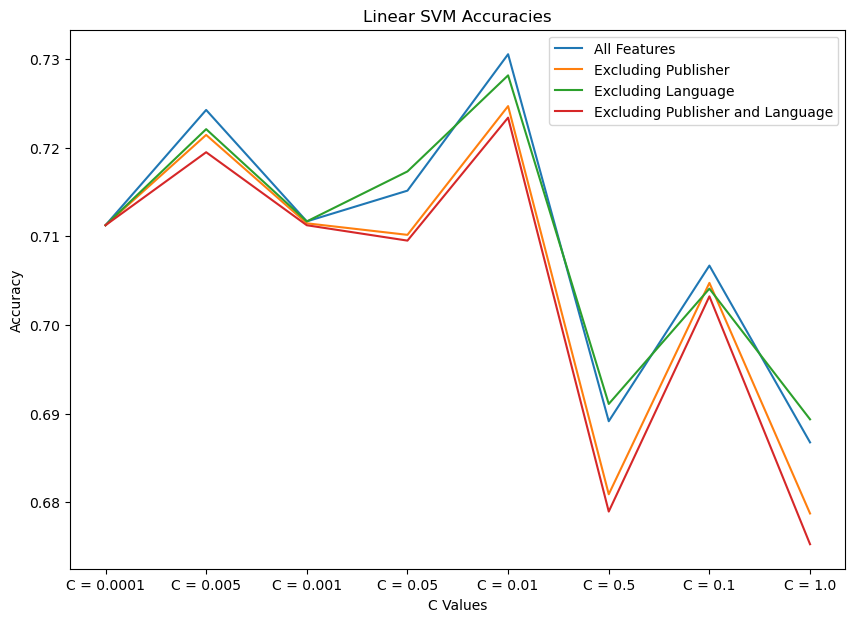

In [20]:
# plot accuracy for different hyperparameter C and features
plt.figure(figsize = (10, 7))
plt.plot(tune, accuracy_list, label='All Features')
plt.plot(tune, accuracy_list_l, label='Excluding Publisher')
plt.plot(tune, accuracy_list_p, label='Excluding Language')
plt.plot(tune, accuracy_list_lp, label='Excluding Publisher and Language')
plt.title("Linear SVM Accuracies")
plt.xlabel("C Values")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

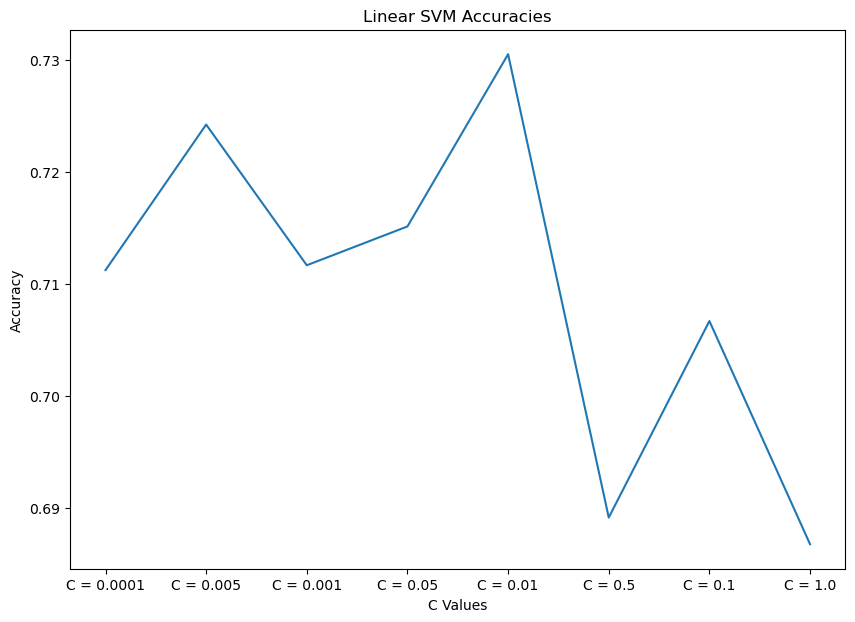

In [21]:
# plot accuracy of model on all features data with different values of C 
plt.figure(figsize = (10, 7))
plt.plot(tune, accuracy_list, label='All Features')
plt.title("Linear SVM Accuracies")
plt.xlabel("C Values")
plt.ylabel("Accuracy")
plt.show()

In [22]:
'''Error Analysis Section'''

# apply the model and store the prediction for X_test
predict = []
clf = svm.LinearSVC(C=0.01)
clf.fit(X_train, y_train)
predict.append(clf.predict(X_test))

In [23]:
# convert list of prediction into dataframe
y_pred = []
for value in predict:
    for label in value:
        y_pred.append(label)

pred_df = pd.DataFrame(y_pred, columns = ['prediction'])

In [24]:
# convert true class label of X_test to dataframe
test = pd.DataFrame(y_test.values.tolist(), columns = ['true'])

In [25]:
# take all indexes in X_test
indexes = []
for value in y_test.index:
    indexes.append(value)

In [26]:
# merge all dataframe and keep only those with error prediction
df1 = pd.DataFrame(indexes, columns = ['number'])
df2 = pd.concat([df1, pred_df], axis = 1)
df3 = pd.concat([df2, test], axis = 1)
error = df3[df3['prediction'] != df3['true']]

In [27]:
# categorize according to each feature and count
from collections import Counter
auth = []
day = []
month = []
year = []
page = []
lang = []
publi = []

for i in error['number']:
    
    testing = x_train_original.loc[i]
    day.append(testing['PublishDay'])
    month.append(testing['PublishMonth'])
    year.append(testing['PublishYear'])
    page.append(testing['pagesNumber'])
    lang.append(testing['Language'])
    publi.append(testing['Publisher'])
    auth.append(testing['Authors'])
    
top_auth = dict(sorted(Counter(auth).items(), key=lambda x: x[1], reverse=True)[:5])
top_day = dict(sorted(Counter(day).items(), key=lambda x: x[1], reverse=True)[:5])
top_month = dict(sorted(Counter(month).items(), key=lambda x: x[1], reverse=True)[:5])
top_year = dict(sorted(Counter(year).items(), key=lambda x: x[1], reverse=True)[:5])
top_page = dict(sorted(Counter(page).items(), key=lambda x: x[1], reverse=True)[:5])
top_lang = dict(sorted(Counter(lang).items(), key=lambda x: x[1], reverse=True)[:5])
top_publi = dict(sorted(Counter(publi).items(), key=lambda x: x[1], reverse=True)[:5])

In [28]:
# print result to see categorized features of error 
print(top_auth)
print(top_day)
print(top_month)
print(top_year)
print(top_page)
print(top_lang)
print(top_publi)

{'Ursula Dubosarsky': 4, 'Ziauddin Sardar': 3, 'Marilyn Janovitz': 3, 'Mallanaga Vātsyāyana': 3, 'William Barton': 3}
{1: 540, 15: 47, 28: 41, 17: 41, 6: 32}
{1: 137, 10: 127, 5: 120, 6: 117, 4: 112}
{2006: 141, 2005: 137, 2007: 116, 2004: 101, 2003: 100}
{256: 50, 224: 44, 32: 36, 320: 35, 304: 30}
{'Missing': 1002, 'eng': 225, 'spa': 6, 'fre': 5, 'ger': 2}
{'Oxford University Press, USA': 18, 'Routledge': 17, 'Penguin Books': 12, "St. Martin's Press": 11, 'Princeton University Press': 11}


In [29]:
# apply model to original test dataset using C = 0.01 and all features
x_test_original = pd.read_csv("book_rating_test.csv")
x_test_original['Publisher'].fillna('Unknown', inplace=True)
x_test_original['Language'].fillna('Missing', inplace=True)

vectorizer3 = TfidfVectorizer(vocabulary=vectorizer1.vocabulary_)
publisher_test = vectorizer3.fit_transform(x_test_original['Publisher'])

vectorizer4 = TfidfVectorizer(vocabulary=vectorizer2.vocabulary_)
language_test = vectorizer4.fit_transform(x_test_original['Language'])

scaler = MaxAbsScaler()
features_test = pd.concat([x_test_original['PublishYear'], x_test_original['PublishMonth'],
                      x_test_original['PublishDay'], x_test_original['pagesNumber']], axis = 1)

matrix_test_name = sp.load_npz('test_name_vec.npz')
matrix_test_authors = sp.load_npz('test_authors_vec.npz')
matrix_test_desc = sp.load_npz('test_desc_vec.npz')

matrix_combine_test = hstack([features_test, matrix_test_name])
matrix_combine_test_2 = hstack((matrix_combine_test, matrix_test_authors))
matrix_test = hstack((matrix_combine_test_2, matrix_test_desc))
matrix_test2 = hstack((matrix_test, publisher_test))
X_test = hstack((matrix_test2, language_test))

X_test = scaler.fit_transform(X_test)
matrix = scaler.fit_transform(matrix)

predictions = {}
model = svm.LinearSVC(C=0.01)
model.fit(matrix, y)
predictions['y_predict'] = model.predict(X_test)

# assign prediction to a list 
predict = []
for key, value in predictions.items():
    for values in value:
        predict.append(values)

In [30]:
# create csv for prediction for kaggle 
import csv

data = [(i + 1, value) for i, value in enumerate(predict)]

with open("prediction_linearSVM.csv", "wt") as fp:
    writer = csv.writer(fp, delimiter=",")
    writer.writerow(["id", "rating_label"])
    writer.writerows(data)

In [31]:
'''0R Baseline Classifier'''

# import library
from sklearn.dummy import DummyClassifier

# load data
x_train_original = pd.read_csv("book_rating_train.csv")
X_train_r = x_train_original.iloc[:, :-1]
y = x_train_original['rating_label']

# split dataset to train and test, create a 0R model
x_train, x_test, y_train, y_test = train_test_split(X_train_r, y, train_size = 0.8, test_size=0.2, random_state=42)
zeroR = DummyClassifier(strategy="most_frequent")

# Fit the 0R model on the training data
zeroR.fit(x_train, y_train)

# Predict using the 0R model
y_pred = zeroR.predict(x_test)

# Calculate accuracy and classification report for the model
accuracy = accuracy_score(y_test, y_pred)
print("ZeroR Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

ZeroR Accuracy: 0.7112508129200087
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00      1136
         4.0       0.71      1.00      0.83      3281
         5.0       0.00      0.00      0.00       196

    accuracy                           0.71      4613
   macro avg       0.24      0.33      0.28      4613
weighted avg       0.51      0.71      0.59      4613



/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vanessagraciatan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [32]:
# Apply 0R Classifier to original test data
x_test_original = pd.read_csv("book_rating_test.csv")

predictions = {}
zeroR.fit(x_train_original, y)
predictions['y_predict'] = zeroR.predict(x_test_original)

In [33]:
# assign prediction to a list 
predict = []
for key, value in predictions.items():
    for values in value:
        predict.append(values)
        
# create csv for prediction using 0R
import csv

data = [(i + 1, value) for i, value in enumerate(predict)]

with open("prediction_zeroR.csv", "wt") as fp:
    writer = csv.writer(fp, delimiter=",")
    writer.writerow(["id", "rating_label"])
    writer.writerows(data)

In [34]:
'''This section is the same as first section'''
# load the datasets (features and labels)
x_train_original = pd.read_csv("book_rating_train.csv")
y = x_train_original['rating_label']

# fill in missing values
x_train_original['Publisher'].fillna('Unknown', inplace=True)
x_train_original['Language'].fillna('Missing', inplace=True)

In [35]:
# num of missing value in language
i = 0
for value in x_train_original['Language'].tolist():
    if value =='Missing':
        i+=1
print(i)

17202


In [36]:
# num of missing value in publisher 
j = 0
for value in x_train_original['Publisher'].tolist():
    if value =='Unknown':
        j+=1
print(j)

148
